In [44]:
!git clone https://github.com/misbah4064/opencvTutorial.git
%cd opencvTutorial/
from IPython.display import clear_output
clear_output()

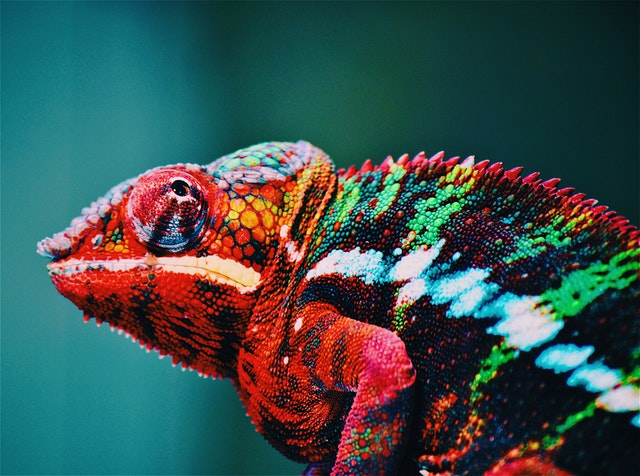

In [45]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/opencvTutorial/images/color.jpg')
cv2_imshow(image)

In [46]:
print(image.shape)

(476, 640, 3)


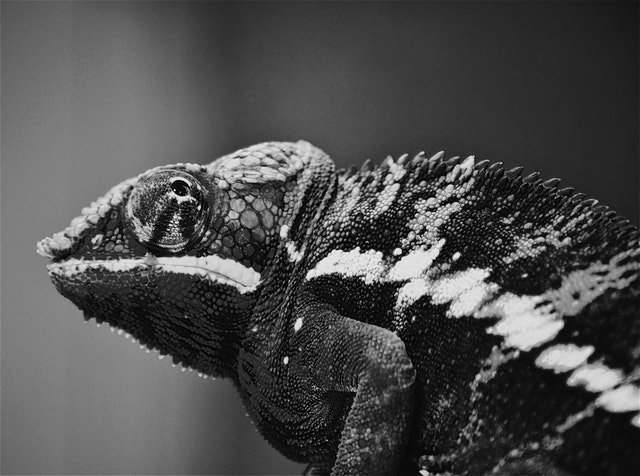

In [47]:
#into grayscale

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

In [48]:
print(gray.shape)

(476, 640)


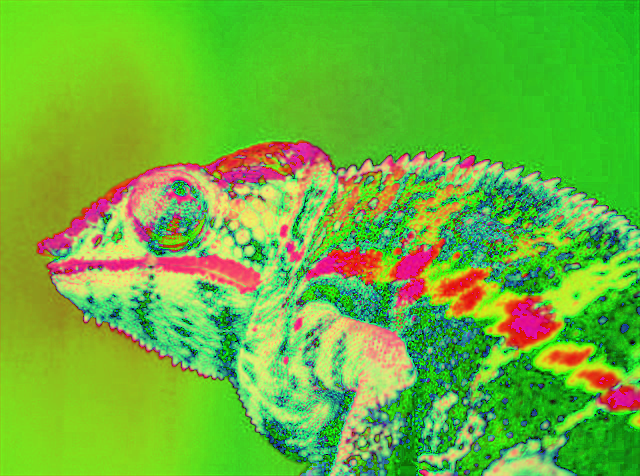

In [49]:
#ini pojok warnanya doang
HSV = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
cv2_imshow(HSV)

**2. Edge detection**

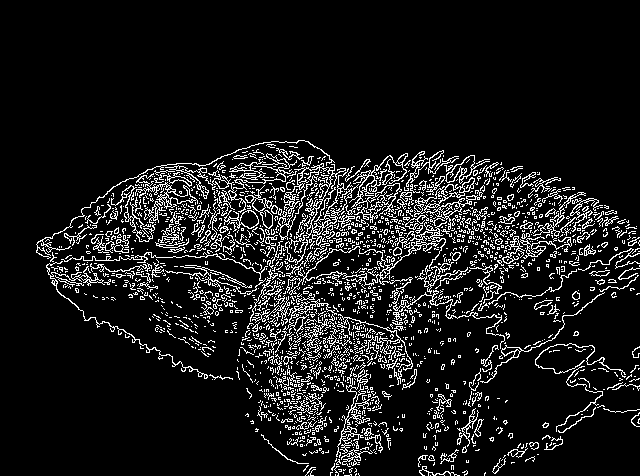

In [50]:
#canny detection

canny_image = cv2.Canny(gray,150,200)
cv2_imshow(canny_image)

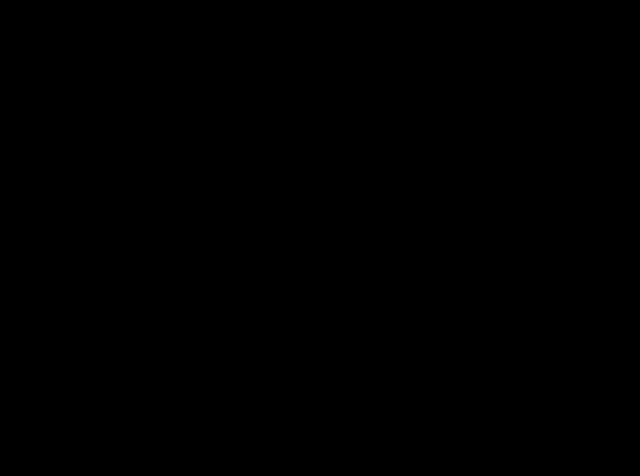

In [51]:
#erosion and dilation
import numpy as np
kernel = np.ones((5,5),np.uint8)
erode_image = cv2.erode(canny_image,kernel,iterations = 1)
cv2_imshow(erode_image)

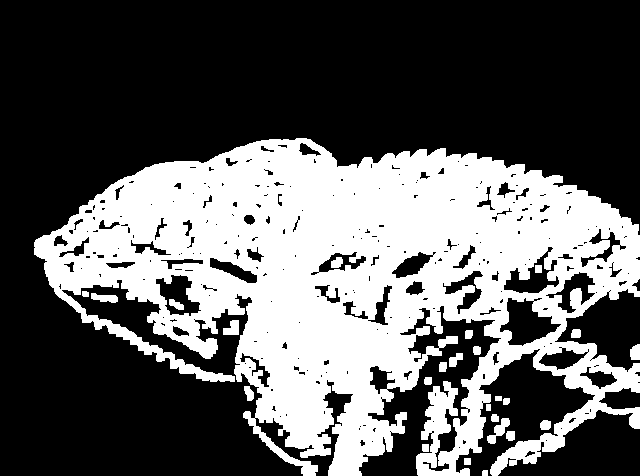

In [52]:
#delition image

dilate_image = cv2.dilate(canny_image,kernel,iterations=1)
cv2_imshow(dilate_image)

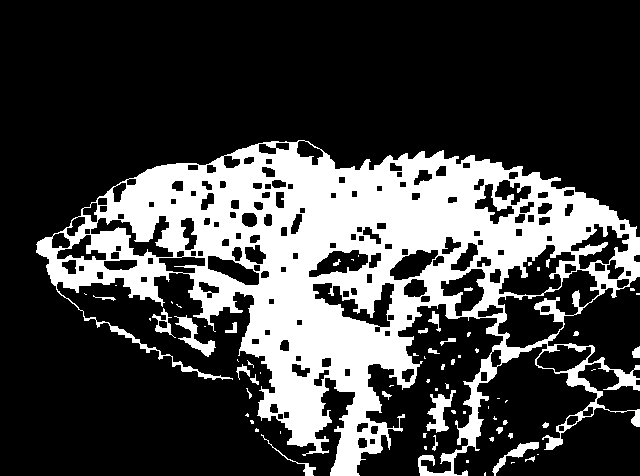

In [53]:
#both are
erode_image = cv2.erode(dilate_image,kernel,iterations = 1)
cv2_imshow(erode_image)

**Noise Image**

In [54]:
image = cv2.imread('/content/opencvTutorial/images/lion.jpg')
# cv2_imshow(image)

dst = cv2.fastNlMeansDenoisingColored(image,None,20,20,7,15)
display = np.hstack((image, dst))
cv2_imshow(display)

Output hidden; open in https://colab.research.google.com to view.

**Drawing shape and writing text on image**

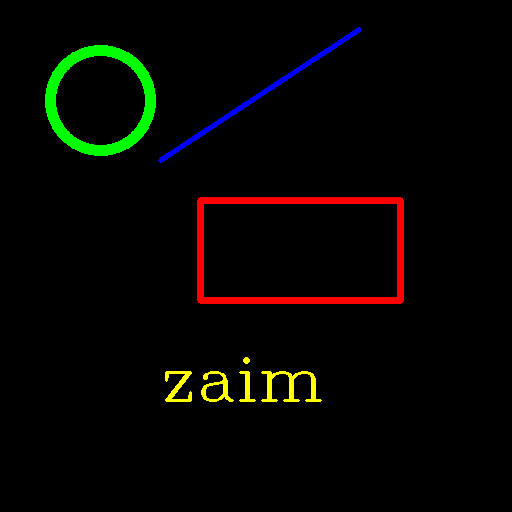

In [55]:
image = np.zeros((512,512,3),np.uint8)
#uint8 = 0 to 255


#drawing fuction
#draw a circle(positon,luas,warna,ketebalan garis)
cv2.circle(image,(100,100),50,(0,255,0),10)
#draw rectangle
cv2.rectangle(image,(200,200),(400,300),(0,0,255),5)
#darw a line
cv2.line(image,(160,160),(359,29),(255,0,0),3)
#write a text
cv2.putText(image,"zaim",(160,400),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,255),2)
cv2_imshow(image)

**intermediate Exercise**

1.Color Detection


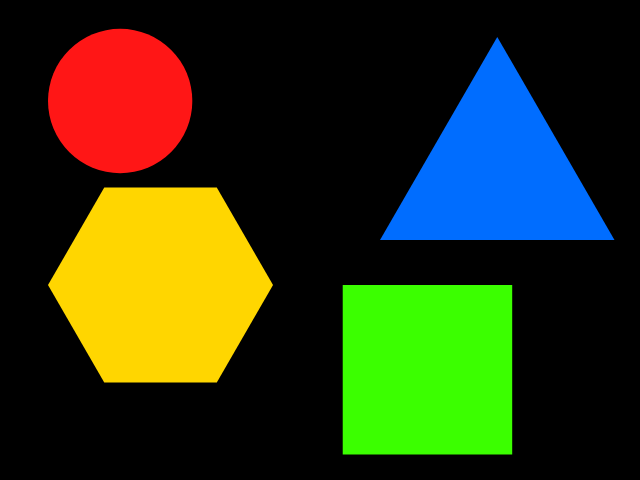

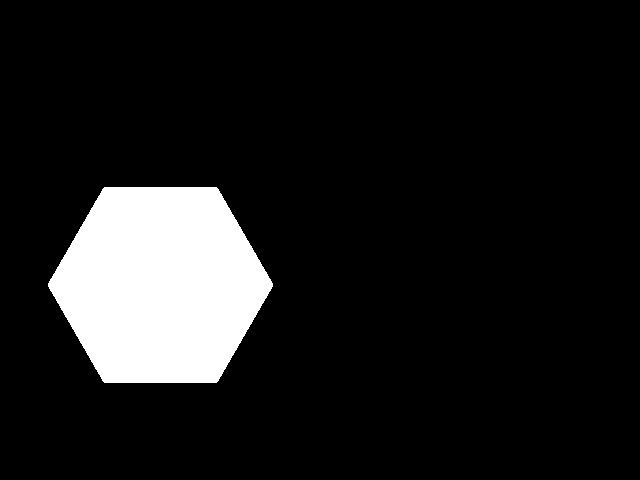

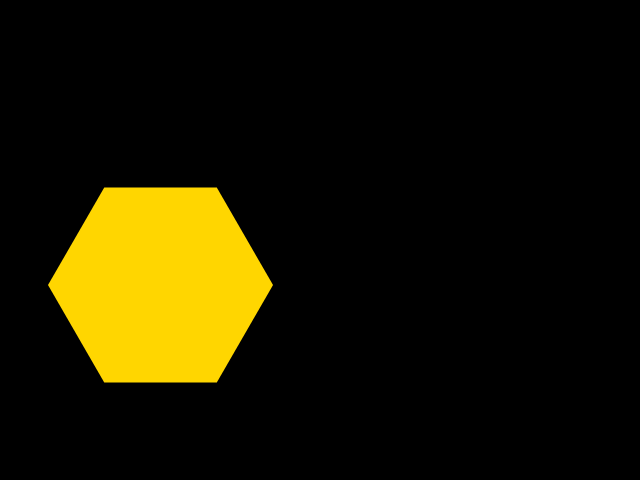

In [56]:
image = cv2.imread('/content/opencvTutorial/images/shapes.png')
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

#blue color
# lower_hue = np.array([65,0,0])
# upper_hue = np.array([110,255,255])

#red color
# lower_hue = np.array([0,0,0])
# upper_hue = np.array([20,255,255])

#green color
# lower_hue = np.array([46,0,0])
# upper_hue = np.array([91,255,255])

#yellow color
lower_hue = np.array([21,0,0])
upper_hue = np.array([45,255,255])


mask = cv2.inRange(hsv,lower_hue,upper_hue)

result = cv2.bitwise_and(image,image,mask = mask)

cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(result)

**face detection**

In [57]:
face_cascade = cv2.CascadeClassifier('/content/opencvTutorial/files/haarcascade_frontalface_default.xml')
image = cv2.imread('/content/opencvTutorial/images/group.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray,1.3,5)
# untuk mengetahui x,y,w,h
# print(faces)
for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)

cv2_imshow(image)

**shape detection**

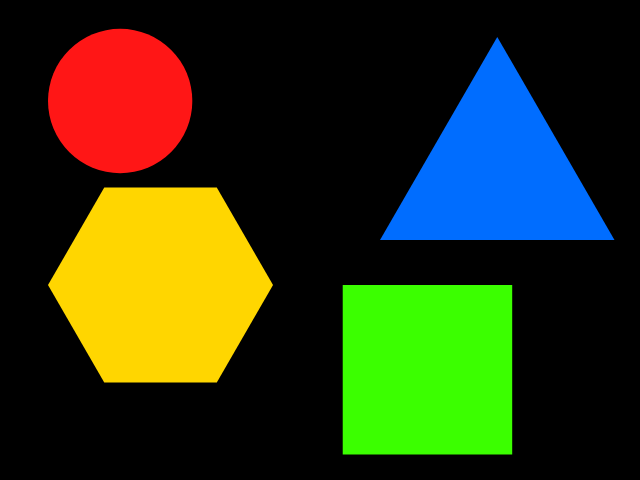

we found a squere
we have a hexagon here
we found a triangle
we found a circle
we found a squere


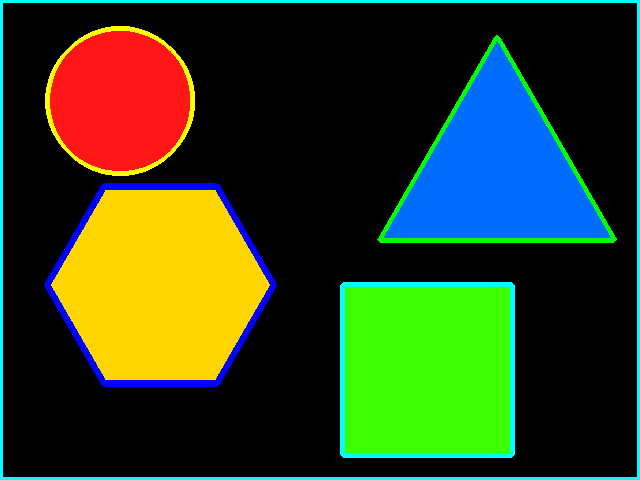

In [69]:
image = cv2.imread('/content/opencvTutorial/images/shapes.png')
cv2_imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,50,255,1)
contours, h = cv2.findContours(thresh,1,2)

#cv2_imshow(thresh)

#tau koordinat dari setiap bentuk(array)
for cnt in contours:
  approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
  #print(approx)
  #jumlah sudut 
  #print(len(approx))
  n = len(approx)
  if n == 6:
    #this is a hexagon
    print("we have a hexagon here")
    cv2.drawContours(image,[cnt],0,255,5)
  elif n == 3:
    #this is a triangle
    print('we found a triangle')
    cv2.drawContours(image,[cnt],0,(0,255,0),3)
  elif n > 9:
    #this is a circle
    print('we found a circle')
    cv2.drawContours(image,[cnt],0,(0,255,255),3)
  elif n == 4:
    #this is a squere
    print('we found a squere')
    cv2.drawContours(image,[cnt],0,(255,255,0),3)
cv2_imshow(image)

